In [1]:
# 1. Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import re
import kagglehub

In [2]:
# 2. Load Dataset
path = kagglehub.dataset_download("andrewmvd/cyberbullying-classification")
df = pd.read_csv(f"{path}/cyberbullying_tweets.csv")

# Display few rows
print(df.head())

                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [3]:
# 3. Data Summary
print(df.info())
print(df.describe())
print("Number of samples per class:\n", df['cyberbullying_type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None
                      tweet_text cyberbullying_type
count                      47692              47692
unique                     46017                  6
top     MARINATED IN GATER TEARS           religion
freq                           2               7998
Number of samples per class:
 cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


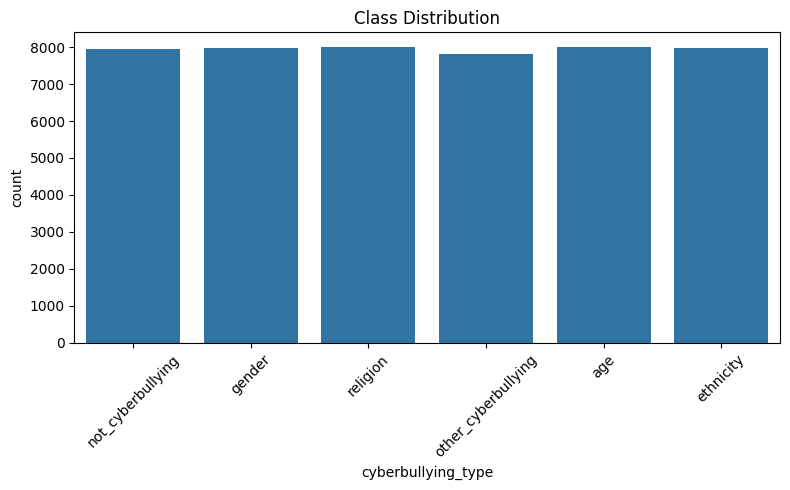

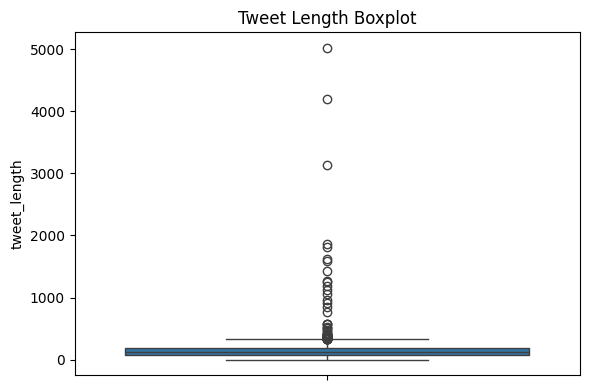

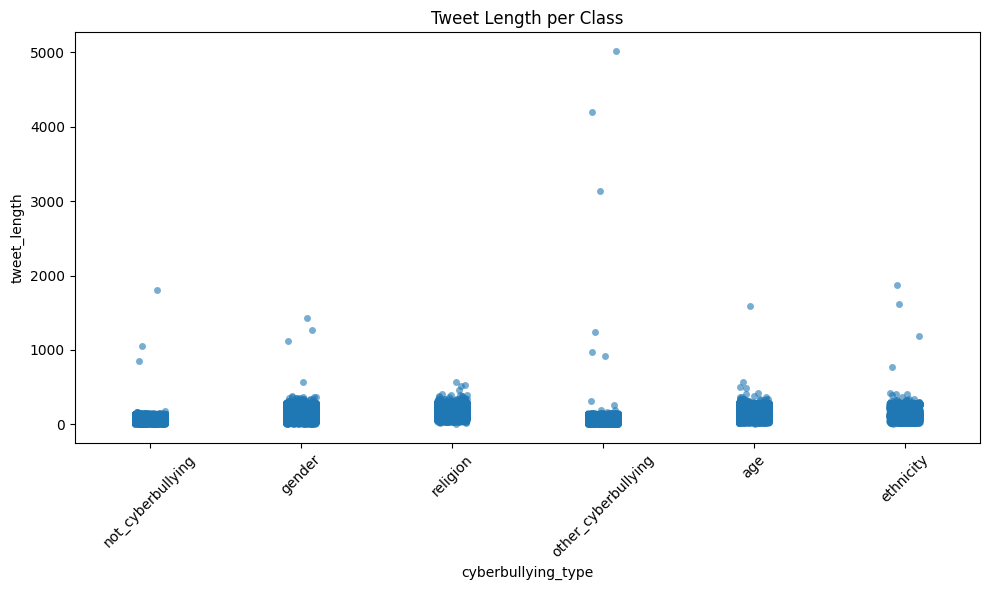

In [4]:
# 4. Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is already loaded as 'df'

df['tweet_length'] = df['tweet_text'].apply(len)

# 1. Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='cyberbullying_type', data=df)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

# 2. Boxplot for tweet length (detect outliers)
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['tweet_length'])
plt.title("Tweet Length Boxplot")
plt.tight_layout()
plt.show()

# 3. Scatter Plot (tweet length vs. class)
plt.figure(figsize=(10, 6))
sns.stripplot(x='cyberbullying_type', y='tweet_length', data=df, jitter=True, alpha=0.6)
plt.title("Tweet Length per Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [6]:
# 5. Data Preprocessing
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Keep only letters
    text = text.lower().strip()
    return text

df['clean_text'] = df['tweet_text'].apply(clean_text)

# Remove outliers (very short or very long tweets)
df = df[(df['tweet_length'] > 10) & (df['tweet_length'] < 500)]

# Drop missing values
df.dropna(inplace=True)

# Display few rows of the cleaned data
print("Cleaned Data Head:")
print(df[['tweet_text', 'clean_text']].head())

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Display shape of the TF-IDF matrix
print("\nShape of TF-IDF matrix (X):", X.shape)

# Z-score standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display few rows of the scaled data (note: this will be a numpy array)
print("\nScaled Data (first 5 rows, first 5 features):")
print(X_scaled[:5, :5])


# Target encoding
target_map = {label: idx for idx, label in enumerate(df['cyberbullying_type'].unique())}
y = df['cyberbullying_type'].map(target_map)

# Display few target values and the mapping
print("\nTarget Variable (y) Head:")
print(y.head())
print("\nTarget Mapping:")
print(target_map)

Cleaned Data Head:
                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                          clean_text  
0  in other words  katandandre  your food was cra...  
1  why is  aussietv so white   mkr  theblock  ima...  
2  xochitlsuckkks a classy whore  or more red vel...  
3  jason gio meh   p  thanks for the heads up  bu...  
4  rudhoeenglish this is an isis account pretendi...  

Shape of TF-IDF matrix (X): (47546, 5000)

Scaled Data (first 5 rows, first 5 features):
[[-0.02400756 -0.01882227 -0.01960348 -0.0156491  -0.02757452]
 [-0.02400756 -0.01882227 -0.01960348 -0.0156491  -0.02757452]
 [-0.02400756 -0.01882227 -0.01960348 -0.0156491  -0.02757452]
 [-0.02400756 -0.01882227 -0.019603

In [ ]:
# 6. Split the Dataset
X = df['tweet_text']
y = df['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# We'll use TF-IDF for text vectorization and Logistic Regression for classification
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
model = LogisticRegression(max_iter=1000, random_state=42)


In [ ]:
# 8. Training the Model
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = model.predict(X_test_tfidf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model and vectorizer
joblib.dump(model, 'cyberbullying_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


[[1562    1    4   21   13    2]
 [   2 1548    5   14   30    4]
 [   1    5 1261  147  113    4]
 [  48    7   56  953  505   55]
 [   6   12   65  390 1125   14]
 [   2    2    9   59   13 1481]]
                     precision    recall  f1-score   support

                age       0.96      0.97      0.97      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.90      0.82      0.86      1531
  not_cyberbullying       0.60      0.59      0.59      1624
other_cyberbullying       0.63      0.70      0.66      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.84      0.83      0.83      9539
       weighted avg       0.84      0.83      0.83      9539



['vectorizer.pkl']

In [ ]:
# 9. Inferencing
# Load model and vectorizer
model = joblib.load('cyberbullying_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Example unseen data
new_tweets = ["You're such a loser!", "Let's hang out today!"]
new_tfidf = vectorizer.transform(new_tweets)

# Predict
predictions = model.predict(new_tfidf)
for tweet, label in zip(new_tweets, predictions):
    print(f"Tweet: {tweet} => Prediction: {label}")

Tweet: You're such a loser! => Prediction: other_cyberbullying
Tweet: Let's hang out today! => Prediction: not_cyberbullying
